In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import stats
import seaborn as sns
import math

# Генерируем выборку n = 25

In [51]:
N = 25
tetta = np.random.random (25)
Xn = np.round (np.exp (-tetta), 3)

Xn_s = np.sort (Xn)

print ("Сгенерированная выборка: ")
print (Xn)
print ("Вариационный ряд: ")
print (Xn_s)

Сгенерированная выборка: 
[0.867 0.813 0.985 0.404 0.607 0.927 0.85  0.74  0.418 0.41  0.794 0.781
 0.399 0.674 0.921 0.557 0.502 0.428 0.56  0.399 0.843 0.391 0.497 0.953
 0.648]
Вариационный ряд: 
[0.391 0.399 0.399 0.404 0.41  0.418 0.428 0.497 0.502 0.557 0.56  0.607
 0.648 0.674 0.74  0.781 0.794 0.813 0.843 0.85  0.867 0.921 0.927 0.953
 0.985]


# а) Определить моду, медиану, размах, коэффициент асимметрии

In [52]:
median = Xn_s[12]
scope = Xn_s[N - 1] - Xn_s[0]

print ("Медиана: ", median)
print ("Размах: ", scope)
print ("Мода: ", Xn_s)

a1 = np.mean (Xn)
m2, m3 = 0, 0

for xi in Xn:
    m2 += ((xi - a1) ** 2) / N
    m3 += ((xi - a1) ** 3) / N
gamma = m3 / ((m2) ** (3/2))

print ("Коэффициент ассиметрии: ", gamma)

Медиана:  0.648
Размах:  0.594
Мода:  [0.391 0.399 0.399 0.404 0.41  0.418 0.428 0.497 0.502 0.557 0.56  0.607
 0.648 0.674 0.74  0.781 0.794 0.813 0.843 0.85  0.867 0.921 0.927 0.953
 0.985]
Коэффициент ассиметрии:  0.0868050145245469


# б) Построить эмпирическую функцию распределения и гистограмму и boxplot

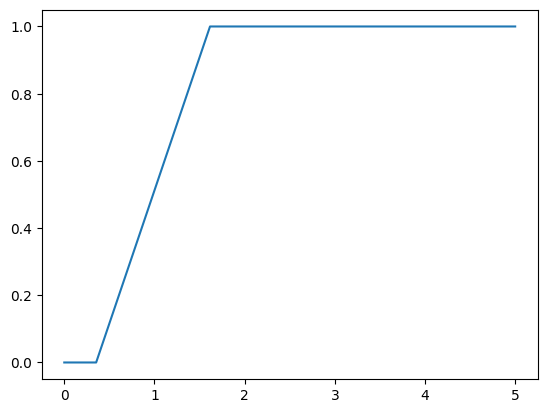

In [53]:
# Эмпирическая
x_tmp = np.linspace (0, 5, 100)

nu = []
it = 0
for x in x_tmp:
    if (it < N and x > Xn_s[it]):
        it += 1
    nu.append (it / N)

plt.plot (x_tmp, nu)

(array([4.71380471, 1.34680135, 1.34680135, 0.67340067, 1.34680135,
        0.67340067, 1.34680135, 2.02020202, 1.34680135, 2.02020202]),
 array([0.391 , 0.4504, 0.5098, 0.5692, 0.6286, 0.688 , 0.7474, 0.8068,
        0.8662, 0.9256, 0.985 ]),
 <BarContainer object of 10 artists>)

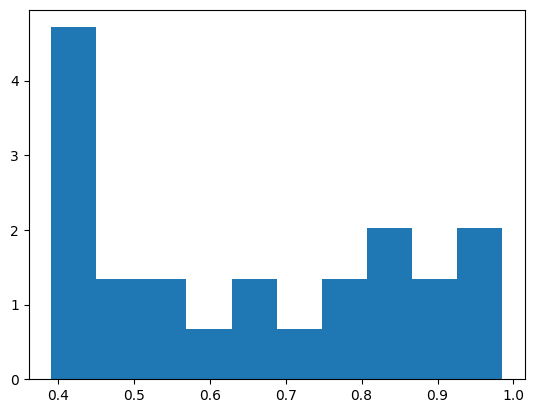

In [54]:
# Гистограмма
plt.hist (Xn, density = True, histtype = 'bar')

x25:  0.423
x75:  0.8465
xmin:  0.391
xmax:  0.985
Выбросы: 


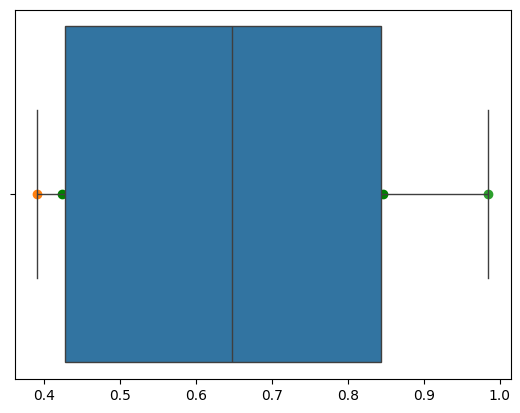

In [55]:
sns.boxplot (Xn_s, orient = 'h')

x25 = (Xn_s[5] + Xn_s[6]) / 2
x75 = (Xn_s[18] + Xn_s[19]) / 2
xmin = Xn_s[0]
xmax = Xn_s[24]

print ("x25: ", x25)
print ("x75: ", x75)
print ("xmin: ", xmin)
print ("xmax: ", xmax)

e = x75 - x25
print ("Выбросы: ")
for x in Xn_s:
    if (x < x25 - 1.5 * e or x > x75 + 1.5 * e):
        print (x)
        plt.scatter (x, 0, c = 'red')
plt.scatter (x25, 0, c = 'green')
plt.scatter (x75, 0, c = 'green')
plt.scatter (xmin, 0)
plt.scatter (xmax, 0)

# в) Найти ядерную оценку плотности

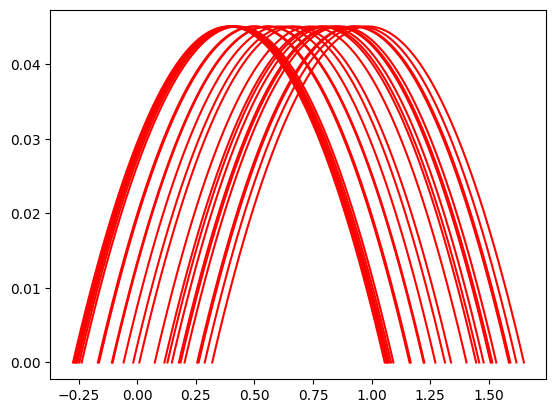

In [56]:
s = math.sqrt (m2 * N / (N - 1))
h = 2.344 * (s / math.pow (s, 1/5))

yadro = []
for x in Xn_s:
    x_U = np.linspace (x - h, x + h, 100)
    yadro_i = (3 / (4 * N * h)) * ( 1 - ((x_U - x) / h) ** 2 )
    yadro.append (yadro_i)
    plt.plot (x_U, yadro_i, c = 'red')

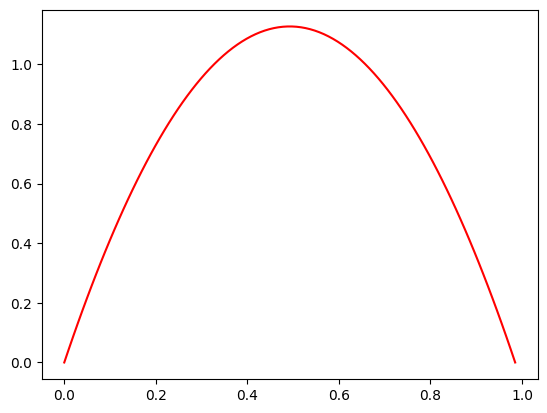

In [57]:
yadro_sum = np.sum (yadro, axis=0)
plt.plot (np.linspace (0, Xn_s[N - 1], 100), yadro_sum, c = 'red')

# Плотность распределения среднего арифметического элементов выборки

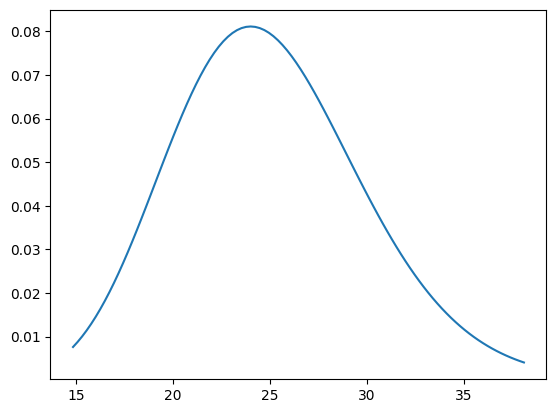

In [75]:
# print ("Первый момент: ", a1)

# a2 = 0
# for x in Xn:
#     a2 += (x)**2 / N
# print ("Второй момент: ", a2)

# mu = a1
# sigma = a2 - a1**2 / N

# X_norm = np.linspace (mu - 3 * sigma, mu + 3 * sigma, 100)
# Y_norm = stats.norm.pdf (X_norm, mu, sigma)

# plt.plot (X_norm, Y_norm)

# X_norm = np.linspace (0, 1, 100)
# Y_norm = stats.gamma.pdf (X_norm, N)

# print (Y_norm)

X_gamma = np.linspace (stats.gamma.ppf (0.01, N), stats.gamma.ppf (0.99, N), 100)
Y_gamma = stats.gamma.pdf (X_gamma, N)

plt.plot (X_gamma, Y_gamma)
# plt.plot (X_norm, Y_norm)

(array([0.03295802, 0.23070614, 1.18648874, 3.22988602, 7.8440089 ,
        9.78853211, 6.52568807, 3.16396998, 0.79099249, 0.13183208]),
 array([0.49048 , 0.520852, 0.551224, 0.581596, 0.611968, 0.64234 ,
        0.672712, 0.703084, 0.733456, 0.763828, 0.7942  ]),
 <BarContainer object of 10 artists>)

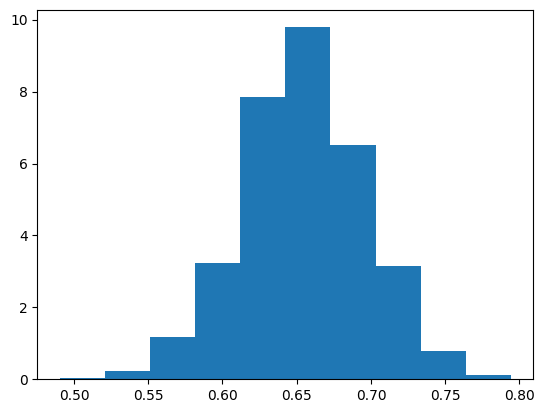

In [79]:
boot_ar = []
for i in range (1, 1000):
    xn_random = np.random.choice (Xn, size = N)
    boot_ar.append (np.mean (xn_random))
plt.hist (boot_ar, density=True, histtype='bar')

# Bootstrap оценка плотности распределения коэффициента асимметрии

(array([0.06977895, 0.1860772 , 0.37215441, 0.56598482, 0.72104916,
        0.61250413, 0.56210822, 0.45743979, 0.22484329, 0.10466843]),
 array([-1.2350494 , -0.97709195, -0.71913451, -0.46117706, -0.20321961,
         0.05473783,  0.31269528,  0.57065272,  0.82861017,  1.08656762,
         1.34452506]),
 <BarContainer object of 10 artists>)

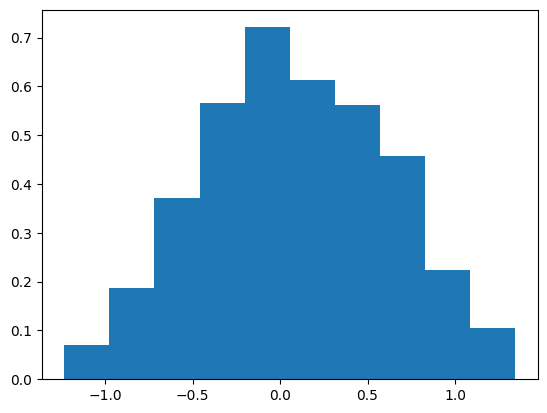

In [60]:
boot_r = []
for i in range (1000):
    xn_random = np.random.choice (Xn, size = N)
    boot_mean = np.mean (xn_random)
    
    m2 = 0
    m3 = 0
    for x in Xn:
        m2 += ((x - boot_mean) ** 2) / N
        m3 += ((x - boot_mean) ** 3) / N
    
    boot_i = m3 / (m2 ** (3/2))
    boot_r.append (boot_i)
plt.hist (boot_r, density=True, histtype='bar')